<a href="https://www.kaggle.com/code/khushisingh19/amazon-products-sales-dataset-2023?scriptVersionId=140453239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/amazon-products-dataset/Gaming Consoles.csv
/kaggle/input/amazon-products-dataset/Car Electronics.csv
/kaggle/input/amazon-products-dataset/Janitorial and Sanitation Supplies.csv
/kaggle/input/amazon-products-dataset/All Electronics.csv
/kaggle/input/amazon-products-dataset/All Books.csv
/kaggle/input/amazon-products-dataset/Make-up.csv
/kaggle/input/amazon-products-dataset/Travel Accessories.csv
/kaggle/input/amazon-products-dataset/Indian Language Books.csv
/kaggle/input/amazon-products-dataset/Car and Bike Care.csv
/kaggle/input/amazon-products-dataset/Sunglasses.csv
/kaggle/input/amazon-products-dataset/Bags and Luggage.csv
/kaggle/input/amazon-products-dataset/Yoga.csv
/kaggle/input/amazon-products-dataset/Sportswear.csv
/kaggle/input/amazon-products-dataset/Fiction Books.csv
/kaggle/input/amazon-products-dataset/Exam Central.csv
/kaggle/input/amazon-products-dataset/Home Storage.csv
/kaggle/input/amazon-products-dataset/Toys Gifting Store.csv
/kaggle/input/amazon-pr

In [2]:
df=pd.read_csv('/kaggle/input/amazon-products-dataset/Amazon-Products.csv')
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [4]:
df.shape

(551585, 10)

In [5]:
df.isna().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
551580    False
551581    False
551582    False
551583    False
551584    False
Length: 551585, dtype: bool

In [7]:
# Remove unwanted column
df.drop(columns=['image', 'link'], inplace=True)

In [8]:
# Remove space and rupee sign from disocunt_price and actual_price
df['discount_price']=df['discount_price'].str.strip()
df['discount_price']= df['discount_price'].str.split('₹', expand=True).get(1)
df['actual_price']=df['actual_price'].str.strip()
df['actual_price']= df['actual_price'].str.split('₹', expand=True).get(1)

In [9]:
# remove comma (,) sign from discount price and actula price
df['discount_price'] = df['discount_price'].str.replace(',','')
df['actual_price'] = df['actual_price'].str.replace(',','')

In [10]:
df['discount_price']= df['discount_price'].astype(float)
df['actual_price']= df['actual_price'].astype(float)

In [11]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [12]:
df['ratings'] = df['ratings'].replace(['FREE', 'Get', '₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99'],'0.0')

In [13]:
df.drop_duplicates()

,Unnamed: 0,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",32999.0,58990.0
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",46490.0,75990.0
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",34490.0,61990.0
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,37990.0,68990.0
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,34490.0,67790.0
...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,3449.0,4599.0
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,1199.0,1999.0
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,1199.0,1999.0
551583,1102,Puma Men Shorts,sports & fitness,Yoga,4.4,37,NaN,NaN


In [14]:
# Change the datatype of ratings from object float.
df['ratings']=df['ratings'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   ratings         375791 non-null  float64
 5   no_of_ratings   375791 non-null  object 
 6   discount_price  490422 non-null  float64
 7   actual_price    533772 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 33.7+ MB


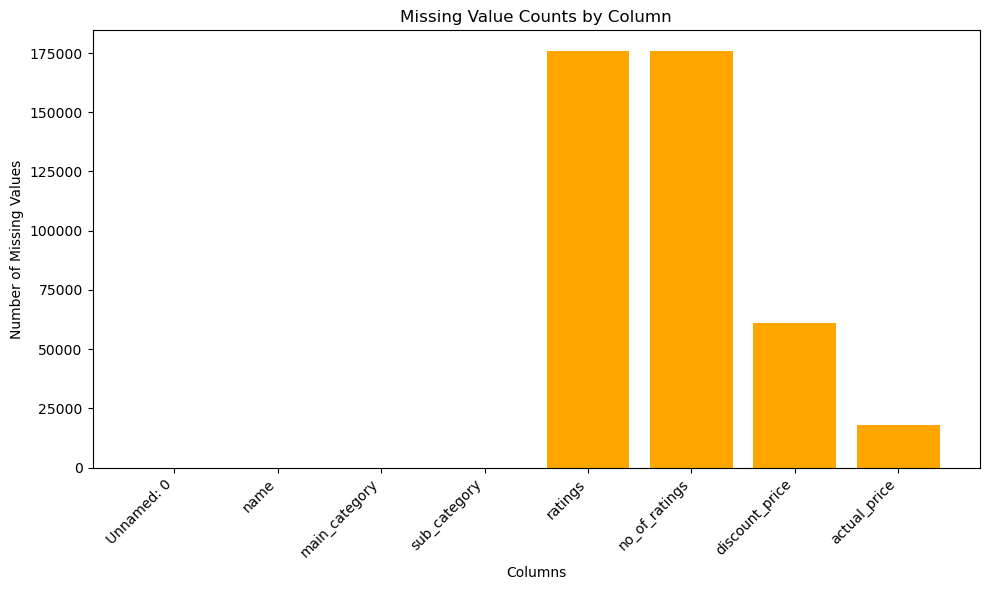

In [16]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Create a bar plot for missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values, color='orange')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Value Counts by Column")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


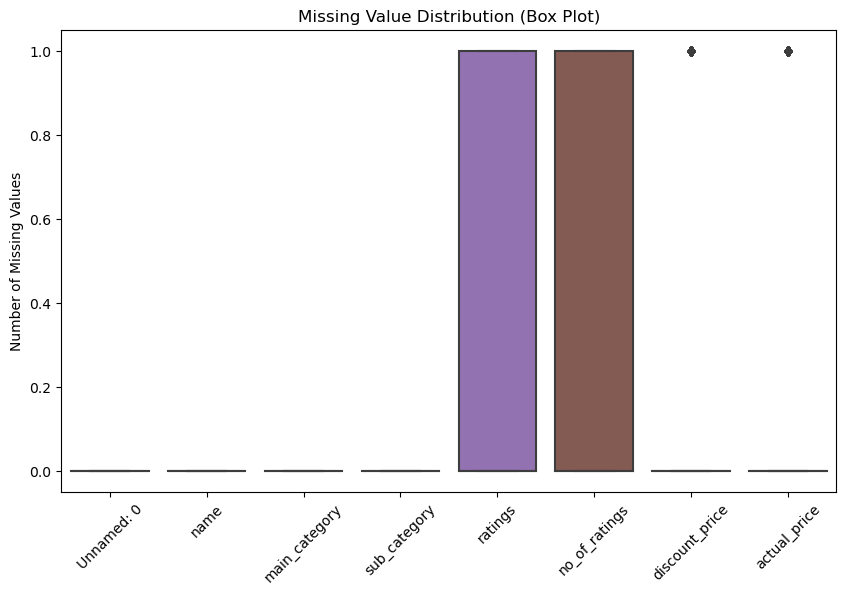

In [17]:
# Create a box plot for missing values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.isnull())
plt.title("Missing Value Distribution (Box Plot)")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()



In [18]:
# Remove rows with missing values in the 'ratings' column
df_cleaned = df.dropna(subset=['ratings'])

# Display the shape of the cleaned dataframe
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)

Original Shape: (551585, 8)
Cleaned Shape: (375791, 8)


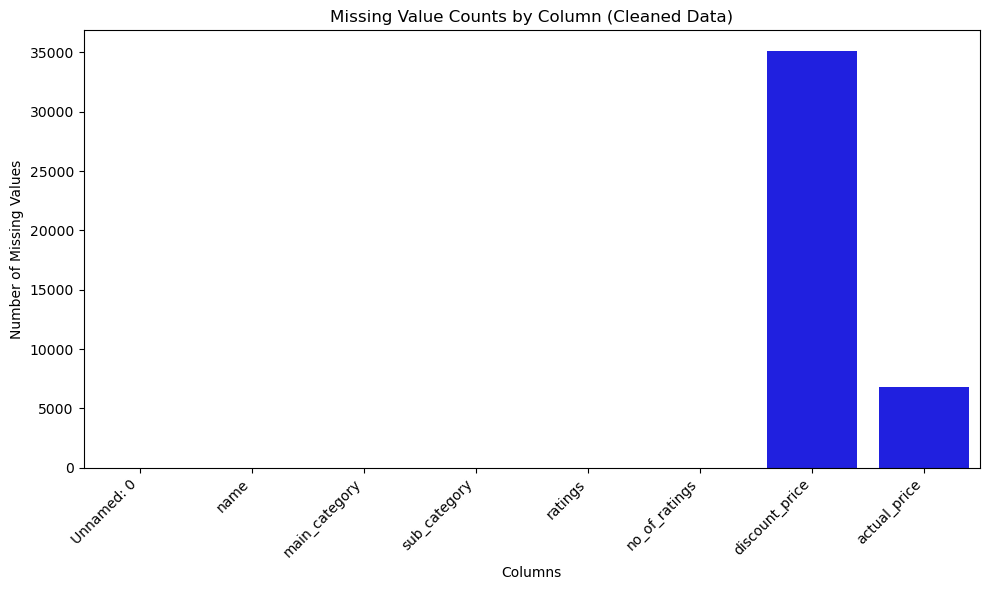

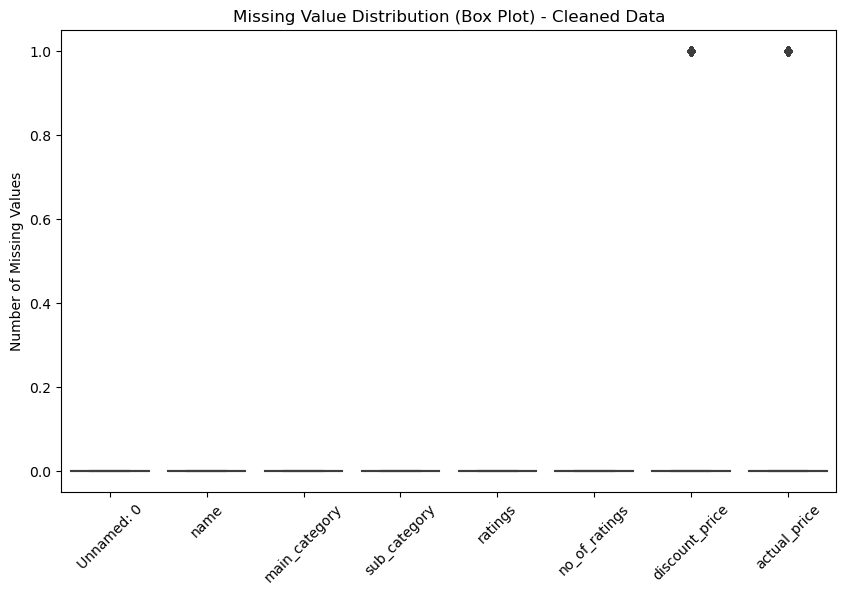

In [19]:
# Calculate the count of missing values in each column for the cleaned data
cleaned_missing_counts = df_cleaned.isnull().sum()

# Create a bar plot for missing value counts in the cleaned data
plt.figure(figsize=(10, 6))
sns.barplot(x=cleaned_missing_counts.index, y=cleaned_missing_counts.values, color='blue')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Value Counts by Column (Cleaned Data)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a box plot for missing value distribution in the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.isnull())
plt.title("Missing Value Distribution (Box Plot) - Cleaned Data")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()


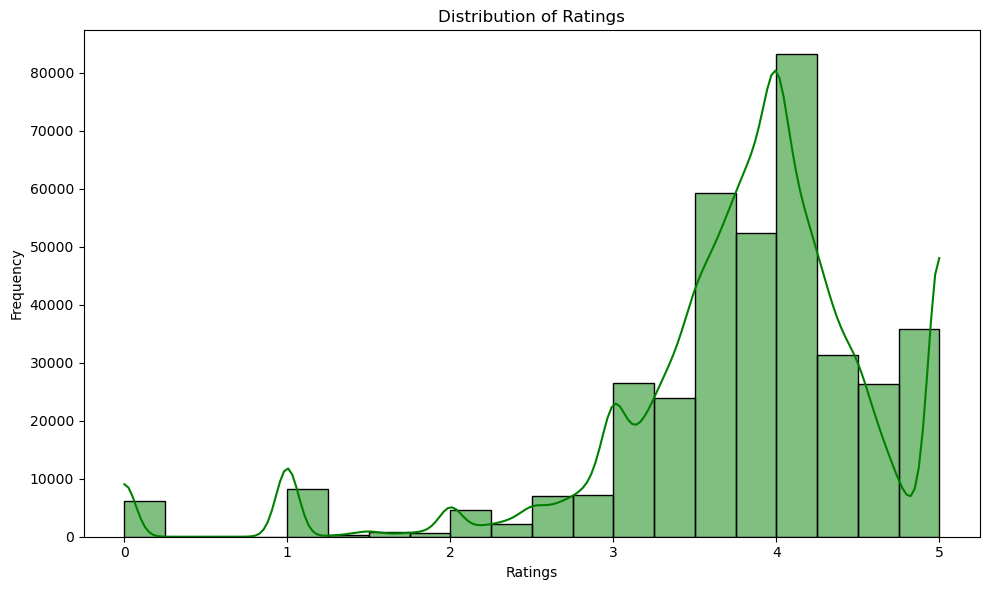

In [20]:
# Create a histogram for the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='ratings', bins=20, kde=True, color='green')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.tight_layout()
plt.show()


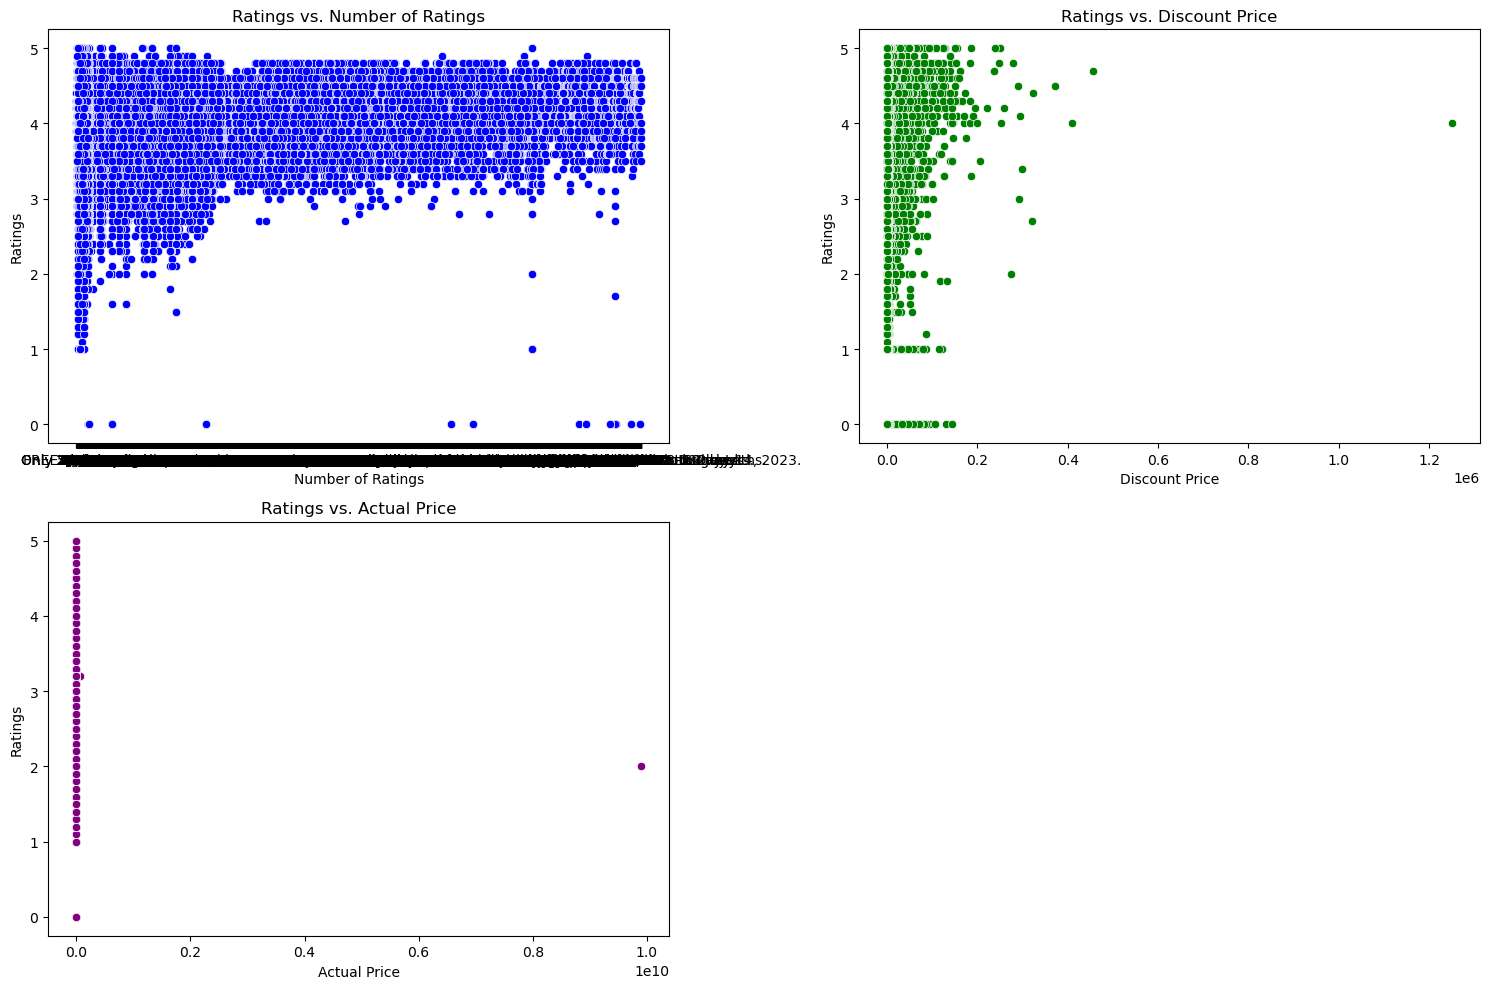

In [21]:
# Create scatter plots for ratings vs. other numerical columns
plt.figure(figsize=(15, 10))

# Scatter plot for ratings vs. no_of_ratings
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_cleaned, x='no_of_ratings', y='ratings', color='blue')
plt.xlabel("Number of Ratings")
plt.ylabel("Ratings")
plt.title("Ratings vs. Number of Ratings")

# Scatter plot for ratings vs. discount_price
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_cleaned, x='discount_price', y='ratings', color='green')
plt.xlabel("Discount Price")
plt.ylabel("Ratings")
plt.title("Ratings vs. Discount Price")

# Scatter plot for ratings vs. actual_price
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_cleaned, x='actual_price', y='ratings', color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Ratings")
plt.title("Ratings vs. Actual Price")

plt.tight_layout()
plt.show()
